In [2]:
# 라이브러리 가져오기
# 라이브러리 가져오기
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.font_manager as fm
import matplotlib as mpl
plt.rc('font', family='Malgun Gothic') # For Windows
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [3]:
df = pd.read_csv("최종.csv",index_col=0)


In [4]:
df["조건2"].value_counts()

1    9778
0    4769
Name: 조건2, dtype: int64

In [5]:
# 최종데이터에서 금융관련 기업 추출
ind_금융 = df[df["통계청 한국표준산업분류 10차(대분류)"].str.contains("금융")]["회사명"].index

# 금융 관련 기업 삭제
df.drop(index=ind_금융, axis=0, inplace=True)

In [25]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '대주주지분변화분', '외국인지분분변화', '상장일', '자산',
       '당기순이익(손실)', '미처분이익잉여금(결손금)', '총자본증가율', '비유동자산증가율', '유동자산증가율',
       '자기자본증가율', '매출액증가율', '정상영업이익증가율', '순이익증가율', '총포괄이익증가율', '매출액순이익률',
       '총자본순이익률', '자기자본순이익률', '매출원가대매출액비율', '광고선전비대매출액비율', '유보율', '비유동비율',
       '유동비율', '당좌비율', '현금비율', '부채비율', '유동부채비율', '차입금비율', '이자보상배율(이자비용)',
       '유보액대비율', '유보액대납입자본배율', '투자집중도', '통계청 한국표준산업분류 10차(대분류)', '직급명',
       '1인평균지급액(임원)', '1인년간평균급여(직원)', '토빈Q', '조건2', 'WW지수', 'RDS', '수명주기'],
      dtype='object')

In [33]:
ind_미처분["미처분이익잉여금(결손금)"].value_counts

<bound method IndexOpsMixin.value_counts of 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
Name: 미처분이익잉여금(결손금), dtype: float64>

In [29]:
## 미처분이익잉여금이 0미만인 것을 제외
미처분=df[df['미처분이익잉여금(결손금)'] <=0].index
ind_미처분 = df[df["미처분이익잉여금(결손금)"].isin(미처분)].reset_index(drop=True)

df.drop(index=ind_미처분, axis=0, inplace=True)

KeyError: "['회사명', '거래소코드', '회계년도', '대주주지분변화분', '외국인지분분변화', '상장일', '자산', '당기순이익(손실)', '미처분이익잉여금(결손금)', '총자본증가율', '비유동자산증가율', '유동자산증가율', '자기자본증가율', '매출액증가율', '정상영업이익증가율', '순이익증가율', '총포괄이익증가율', '매출액순이익률', '총자본순이익률', '자기자본순이익률', '매출원가대매출액비율', '광고선전비대매출액비율', '유보율', '비유동비율', '유동비율', '당좌비율', '현금비율', '부채비율', '유동부채비율', '차입금비율', '이자보상배율(이자비용)', '유보액대비율', '유보액대납입자본배율', '투자집중도', '통계청 한국표준산업분류 10차(대분류)', '직급명', '1인평균지급액(임원)', '1인년간평균급여(직원)', '토빈Q', '조건2', 'WW지수', 'RDS', '수명주기'] not found in axis"

In [28]:
df.describe()

,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,자산,당기순이익(손실),미처분이익잉여금(결손금),총자본증가율,비유동자산증가율,유동자산증가율,...,이자보상배율(이자비용),유보액대비율,유보액대납입자본배율,투자집중도,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,조건2,WW지수,RDS
count,14469.000000,14469.000000,14469.000000,14469.000000,1.446900e+04,1.446900e+04,1.446900e+04,14469.000000,14469.000000,14469.000000,...,1.446900e+04,14469.000000,14469.000000,14469.000000,1.446900e+04,14469.000000,14469.000000,14469.000000,14469.000000,14469.000000
mean,62933.974013,2016.295321,0.070469,0.076396,1.999250e+09,5.001548e+07,1.523973e+08,9.223492,11.610274,11.466410,...,4.983307e+07,53.933823,23.691541,125.854080,2.602331e+05,50818.155850,831.698959,0.671159,-0.193675,0.047781
std,65102.332171,3.143590,21.094370,5.909030,1.266573e+10,6.405097e+08,1.032091e+09,32.578485,45.316551,64.214972,...,2.176020e+08,22.207295,90.201710,376.781069,1.234054e+06,18039.696157,1105.436895,0.469808,12.093367,0.292420
min,20.000000,2011.000000,-99.000000,-77.190000,8.453731e+06,-5.607732e+09,-8.068869e+09,-78.610000,-98.350000,-95.970000,...,-3.558011e+05,-85.650000,-10.420000,10.680000,0.000000e+00,0.000000,0.025178,0.000000,-9.495995,-0.001822
25%,11320.000000,2014.000000,-3.950000,-0.950000,1.025709e+08,9.885070e+05,1.301580e+07,-0.620000,-1.910000,-4.470000,...,1.770000e+00,37.880000,5.890000,75.160000,3.600000e+04,39069.000000,309.360252,0.000000,-1.123260,0.000000
50%,42520.000000,2016.000000,0.000000,0.020000,2.177533e+08,5.537459e+06,3.759450e+07,4.240000,2.900000,4.120000,...,7.160000e+00,54.200000,11.530000,101.800000,1.592400e+05,47745.000000,553.363365,1.000000,-0.591075,0.004259
75%,92070.000000,2019.000000,3.940000,1.070000,6.131371e+08,1.696858e+07,9.365955e+07,12.750000,13.860000,17.220000,...,4.043000e+01,71.300000,21.990000,141.160000,2.960000e+05,58962.000000,998.555653,1.000000,0.153508,0.029148
max,382480.000000,2021.000000,94.670000,78.450000,4.266212e+11,3.281513e+10,5.231138e+10,1720.860000,1426.710000,3279.340000,...,1.000000e+09,147.550000,4172.820000,43349.110000,1.400000e+08,533000.000000,55228.223302,1.000000,1424.056086,15.293005


In [6]:
# 결측치 확인  - 엄슴
df.isna().sum().sum()

0

In [7]:
# 양의 무한대 값 추출 --엄슴
print(len(df[df.values == math.inf]))

# 음의 무한대 값 추출 --엄슴
print(len(df[df.values ==-np.inf]))

0
0


In [8]:
# 숫자현 컬럼만 있는 데이터프레임 생성 
# df_1 = df[df.select_dtypes(float).columns]

# 숫자형 데이터프레임 컬럼 추출
# col_int=df_1.columns

#  데이터 박스플롯으로 보기

# plt.figure(figsize=(20,20))

# for i in range(1,35,1):
#     plt.subplot(5,7,i)
#     a = df_1.iloc[:,i]
#     plt.boxplot(a)
#     b = col_int.str[:7][i-1]
#     plt.title(b)
# plt.show()
   
        

## 박스플롯 이상치 제거
- 박스플롯을 이용해서 현저하게 이상한 값이 관측되는 컬럼 제거

In [9]:
df["당좌비율"].max()

42354.18

In [10]:
df[df["당좌비율"] == 42354.18]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,당기순이익(손실),미처분이익잉여금(결손금),총자본증가율,...,투자집중도,통계청 한국표준산업분류 10차(대분류),직급명,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,조건2,WW지수,RDS,수명주기
1708,(주)메지온,140410,2013,0.0,0.07,2012/01/20,63339954.0,-830752.0,20484503.0,-5.89,...,1358.69,"전문, 과학 및 기술 서비스업",등기이사,405000.0,135423.0,1876.775062,0,-2.63464,0.223192,쇠퇴기


In [11]:
df.drop(index=1708, axis=0 ,inplace=True)
df.reset_index(drop=True,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x252e747eac0>,
 'caps': [<matplotlib.lines.Line2D at 0x252e749f040>,
 'boxes': [<matplotlib.lines.Line2D at 0x252e747e820>],
 'medians': [<matplotlib.lines.Line2D at 0x252e749f580>],
 'fliers': [<matplotlib.lines.Line2D at 0x252e749f820>],
 'means': []}

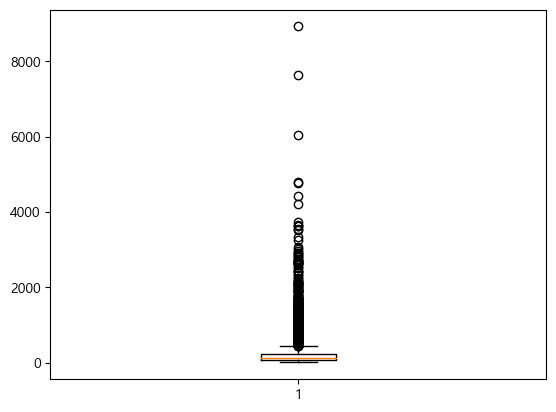

In [12]:
plt.boxplot(df["당좌비율"])

In [13]:
df["자기자본증가율"].max()

14501.35

In [14]:
df[df["자기자본증가율"] == 3090.27]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,당기순이익(손실),미처분이익잉여금(결손금),총자본증가율,...,투자집중도,통계청 한국표준산업분류 10차(대분류),직급명,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,조건2,WW지수,RDS,수명주기
548,(주)넥스틴,348210,2020,0.5,-2.79,2020/10/08,54259283.0,14389525.0,683382.0,193.83,...,108.04,제조업,"등기이사(사외이사,감사위원회 위원 제외)",270457.0,74857.0,6873.305104,0,14.08843,0.101264,성장기


In [15]:
df.drop(index=548, axis=0 , inplace=True)
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x252e750a5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x252e750aa00>,
 'boxes': [<matplotlib.lines.Line2D at 0x252e750a340>],
 'medians': [<matplotlib.lines.Line2D at 0x252e750af70>],
 'fliers': [<matplotlib.lines.Line2D at 0x252e7519250>],
 'means': []}

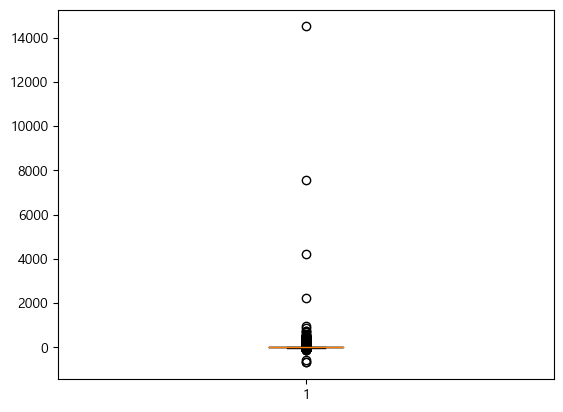

In [16]:
plt.boxplot(df["자기자본증가율"])

In [17]:
df["자기자본증가율"].max()

14501.35

In [19]:
df[df["자기자본증가율"] == 14501.35]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,당기순이익(손실),미처분이익잉여금(결손금),총자본증가율,...,투자집중도,통계청 한국표준산업분류 10차(대분류),직급명,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,조건2,WW지수,RDS,수명주기
8501,KG스틸(주),16380,2019,42.01,-0.65,1986/02/03,2.355272e+09,-30861360.0,-908619341.0,-6.02,...,93.34,제조업,"등기이사(사외이사,감사위원회 위원 제외)",66000.0,65000.0,313.225502,0,-1.319082,0.000854,도입기


In [18]:
df[df["자기자본증가율"] == 2222.78]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,당기순이익(손실),미처분이익잉여금(결손금),총자본증가율,...,투자집중도,통계청 한국표준산업분류 10차(대분류),직급명,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,조건2,WW지수,RDS,수명주기
5818,(주)제놀루션,225220,2020,37.53,-2.94,2020/07/24,83773905.0,32046121.0,26499683.0,523.86,...,78.24,제조업,"등기이사(사외이사,감사위원회 위원 제외)",314000.0,30000.0,1548.909855,1,71.125536,0.005424,성장기


In [29]:
df.drop(index=5300, axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d12b81bd10>,
 'caps': [<matplotlib.lines.Line2D at 0x1d12b808e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d12b81b450>],
 'medians': [<matplotlib.lines.Line2D at 0x1d12b80a050>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d12b808b50>],
 'means': []}

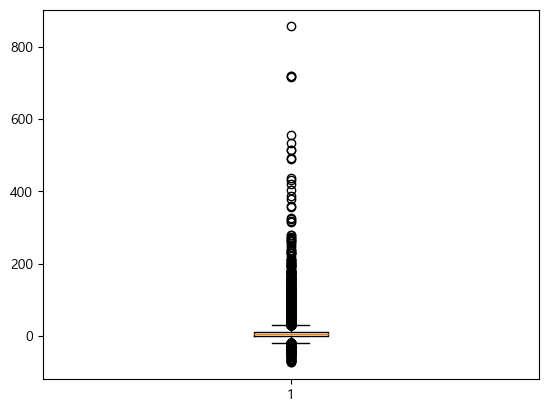

In [30]:
plt.boxplot(df["자기자본증가율"])

In [34]:
df["현금비율"].max()

2745.25

In [35]:
df[df["현금비율"] == 2745.25]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,총자본증가율,비유동자산증가율,유동자산증가율,...,투자집중도,통계청 한국표준산업분류 10차(대분류),직급명,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,target,WW지수,RDS,수명주기
10968,위즈코프(주),38620,2011,-0.03,-0.97,2000/05/04,31662265.0,0.0,0.0,0.0,...,258.83,도매 및 소매업,등기이사,127800.0,17103.0,577.303137,0,-0.756413,0.0,쇠퇴기


In [36]:
df.drop(index=10968, axis=0, inplace=True)


In [37]:
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d12b86f110>,
 'caps': [<matplotlib.lines.Line2D at 0x1d129d9c9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d12b86e750>],
 'medians': [<matplotlib.lines.Line2D at 0x1d129d9e090>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d12b7aead0>],
 'means': []}

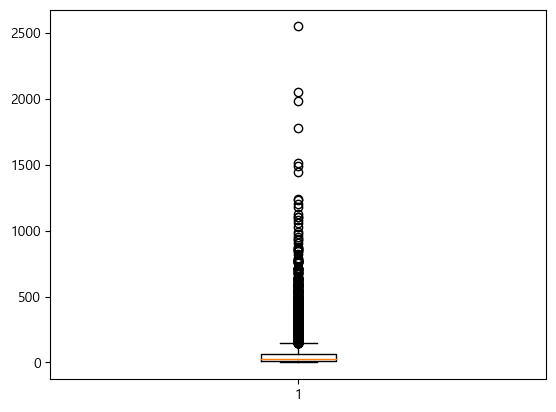

In [38]:
plt.boxplot(df["현금비율"])

In [39]:
np.argmax(df["투자집중도"])

693

In [42]:
df[df["투자집중도"]>=6000]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,총자본증가율,비유동자산증가율,유동자산증가율,...,투자집중도,통계청 한국표준산업분류 10차(대분류),직급명,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,target,WW지수,RDS,수명주기
7611,(주)휴맥스홀딩스,28080,2021,23.69,3.96,1997/04/16,970797278.0,532.28,216.24,3279.34,...,7374.63,정보통신업,"등기이사(사외이사,감사위원회 위원 제외)",133336.0,54254.0,53.988911,0,1.844817,0.0,쇠퇴기


In [40]:
df.drop(index=693, axis=0, inplace=True)
df.reset_index(drop=True,inplace=True)

In [43]:
df.drop(index=7611, axis=0, inplace=True)
df.reset_index(drop=True,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d129e5e990>,
 'caps': [<matplotlib.lines.Line2D at 0x1d129e68150>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d129e5dd90>],
 'medians': [<matplotlib.lines.Line2D at 0x1d129e697d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d129e6a250>],
 'means': []}

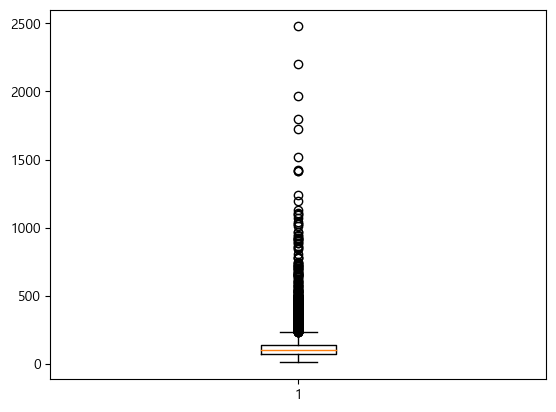

In [44]:
plt.boxplot(df["투자집중도"])

In [45]:
np.argmax(df["투자집중도"])

494

In [46]:
df.drop(index=494, axis=0, inplace=True)
df.reset_index(drop=True,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d129c22950>,
 'caps': [<matplotlib.lines.Line2D at 0x1d129c2c190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d129c21d90>],
 'medians': [<matplotlib.lines.Line2D at 0x1d129c2d7d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d129c23c90>],
 'means': []}

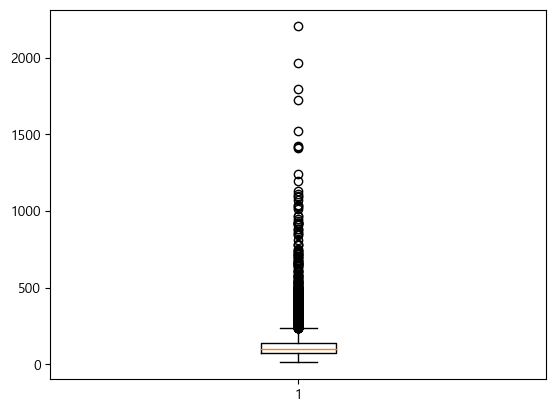

In [47]:
plt.boxplot(df["투자집중도"])

In [50]:
df[df["매출원가대매출액비율"]>=300]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,총자본증가율,비유동자산증가율,유동자산증가율,...,투자집중도,통계청 한국표준산업분류 10차(대분류),직급명,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,target,WW지수,RDS,수명주기
7606,(주)휴맥스홀딩스,28080,2017,-20.07,0.0,1997/04/16,192627732.0,-13.03,-13.59,19.68,...,115.49,정보통신업,"등기이사(사외이사,감사위원회 위원 제외)",160032.0,103589.0,314.53755,0,-0.978376,0.0,성숙기


In [51]:
df.drop(index=7606, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d130a7bb90>,
 'caps': [<matplotlib.lines.Line2D at 0x1d130a7cc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d129ca6610>],
 'medians': [<matplotlib.lines.Line2D at 0x1d130a7e290>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d130a7ca10>],
 'means': []}

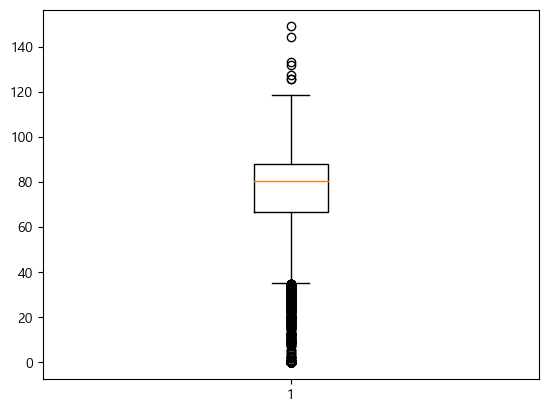

In [52]:
plt.boxplot(df["매출원가대매출액비율"])

In [55]:
df[df["부채비율"]>=2000]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,총자본증가율,비유동자산증가율,유동자산증가율,...,투자집중도,통계청 한국표준산업분류 10차(대분류),직급명,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,target,WW지수,RDS,수명주기
6498,(주)티에이치엔,19180,2014,-2.89,0.0,1996/07/31,208631661.0,1.61,-0.92,6.03,...,64.08,제조업,등기이사,192349.0,43118.0,117.860387,1,-1.222779,0.0,성장기


In [56]:
df.drop(index=6498, axis=0,inplace=True)
df.reset_index(drop=True, inplace=True)


{'whiskers': [<matplotlib.lines.Line2D at 0x1d129fff810>,
 'caps': [<matplotlib.lines.Line2D at 0x1d12a00c890>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d129cae610>],
 'medians': [<matplotlib.lines.Line2D at 0x1d12a00d9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d129cae1d0>],
 'means': []}

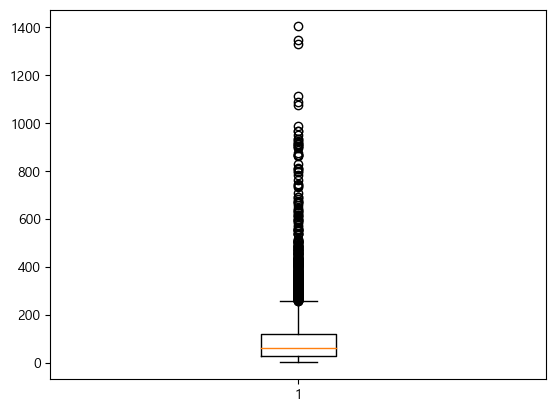

In [57]:
plt.boxplot(df["부채비율"])

In [58]:
np.argmax(df["1인평균지급액(임원)"])

9752

In [59]:
df.drop(index=9752, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d12a063190>,
 'caps': [<matplotlib.lines.Line2D at 0x1d12a070390>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d12a062910>],
 'medians': [<matplotlib.lines.Line2D at 0x1d12a0714d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d12a0639d0>],
 'means': []}

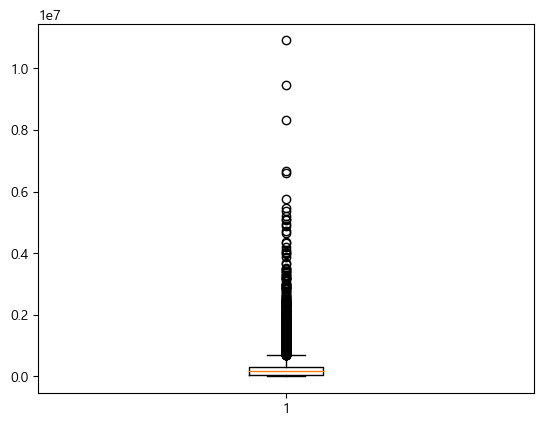

In [60]:
plt.boxplot(df["1인평균지급액(임원)"])

In [61]:
np.argmax(df["순이익증가율"])

4631

In [64]:
df[df["순이익증가율"]>=100000]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,총자본증가율,비유동자산증가율,유동자산증가율,...,투자집중도,통계청 한국표준산업분류 10차(대분류),직급명,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,target,WW지수,RDS,수명주기
8276,대동금속(주),20400,2020,-3.26,0.02,1993/07/30,106206685.0,-0.31,-1.64,2.92,...,94.98,제조업,사외이사 (감사위원회 위원 제외),0.0,80836.0,222.351860,0,-0.022344,0.0,성숙기
11931,태림포장(주),11280,2018,1.78,1.14,1988/12/20,606842052.0,-4.16,-5.75,0.91,...,93.35,제조업,사외이사 (감사위원회 위원 제외),27000.0,41000.0,453.159457,1,-0.327064,0.0,성숙기


In [62]:
df.drop(index=4631, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [65]:
df.drop(index=[8276,11931], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d129ef2250>,
 'caps': [<matplotlib.lines.Line2D at 0x1d129ef35d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d129ef18d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d129f00510>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d129f00c90>],
 'means': []}

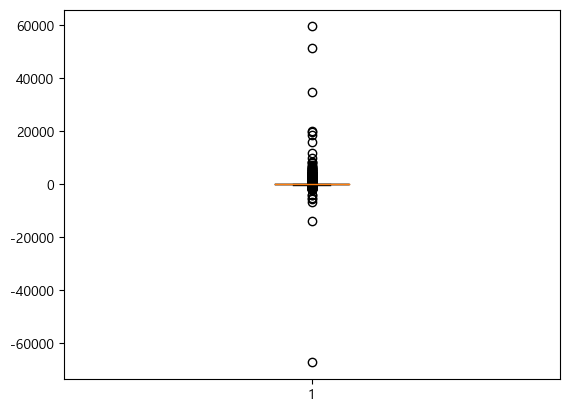

In [66]:
plt.boxplot(df["순이익증가율"])

In [73]:
df[df["토빈Q"] >= 30000]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,총자본증가율,비유동자산증가율,유동자산증가율,...,투자집중도,통계청 한국표준산업분류 10차(대분류),직급명,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,target,WW지수,RDS,수명주기
2285,(주)서산,79650,2016,-15.83,0.53,2005/01/21,122973927.0,11.37,10.56,11.87,...,101.41,제조업,"등기이사(사외이사,감사위원회 위원 제외)",189000.0,43109.0,34136.59678,1,-1.217115,0.0,성숙기


In [74]:
df.drop(index=2285, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d130cf7690>,
 'caps': [<matplotlib.lines.Line2D at 0x1d130d00c90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d130cf6990>],
 'medians': [<matplotlib.lines.Line2D at 0x1d130d02210>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d130d02c10>],
 'means': []}

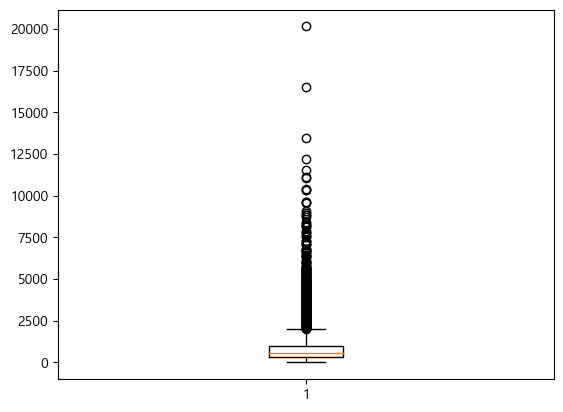

In [75]:
plt.boxplot(df["토빈Q"])

In [77]:
df[df["총자본증가율"] >= 1500]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,총자본증가율,비유동자산증가율,유동자산증가율,...,투자집중도,통계청 한국표준산업분류 10차(대분류),직급명,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,target,WW지수,RDS,수명주기
10385,에스케이(주),34730,2015,-0.22,2.27,2009/11/11,9.663381e+10,1720.86,1426.71,3110.47,...,198.81,"전문, 과학 및 기술 서비스업",등기이사,752000.0,71000.0,188.507497,1,50.331347,0.053603,성숙기


In [78]:
df.drop(index=10385, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d130ba5f10>,
 'caps': [<matplotlib.lines.Line2D at 0x1d130ba7690>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d130b92350>],
 'medians': [<matplotlib.lines.Line2D at 0x1d130bb0c90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d130bb1710>],
 'means': []}

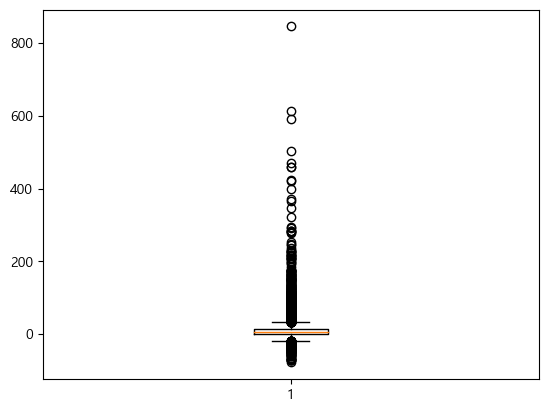

In [79]:
plt.boxplot(df["총자본증가율"])

In [83]:
df["이자보상배율(이자비용)"].replace(999999999,0, inplace=True)

In [84]:
df["이자보상배율(이자비용)"].value_counts().sort_values(ascending=False)

0.00      714
1.30       16
2.16       16
1.03       15
1.02       15
         ... 
42.21       1
72.18       1
37.40       1
98.45       1
252.02      1
Name: 이자보상배율(이자비용), Length: 6278, dtype: int64

In [87]:
df[df["WW지수"]>=1000]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,총자본증가율,비유동자산증가율,유동자산증가율,...,투자집중도,통계청 한국표준산업분류 10차(대분류),직급명,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,target,WW지수,RDS,수명주기
692,(주)대덕,8060,2021,-0.13,-6.13,1989/01/26,1.723958e+09,5.2,-3.07,19.16,...,113.55,"전문, 과학 및 기술 서비스업",사외이사 (감사위원회 위원 제외),36000.0,112000.0,156.310482,1,1424.056086,0.285589,성숙기


In [88]:
df.drop(index=692, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d130b447d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d130bf66d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d1310177d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d130bdf550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d131252290>],
 'means': []}

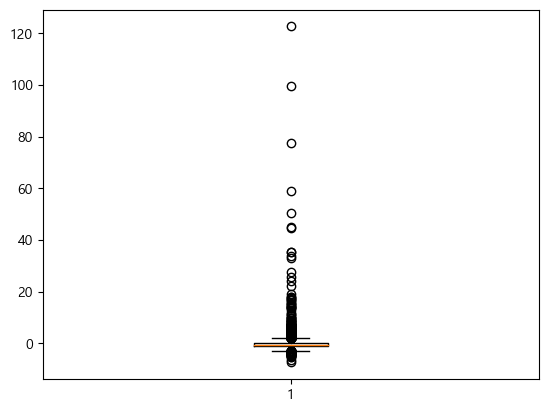

In [89]:
plt.boxplot(df["WW지수"])

In [92]:
df[df["매출액순이익률"] >= 2000]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,총자본증가율,비유동자산증가율,유동자산증가율,...,투자집중도,통계청 한국표준산업분류 10차(대분류),직급명,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,target,WW지수,RDS,수명주기
1934,(주)비지에프,27410,2017,0.00,-14.48,2014/05/19,858118605.0,-55.25,-55.05,-55.44,...,543.66,"전문, 과학 및 기술 서비스업","등기이사(사외이사,감사위원회 위원 제외)",458000.0,64000.0,1233.263180,1,-2.833170,0.0,성숙기
12278,한국앤컴퍼니(주),240,2012,0.16,-9.49,1968/12/27,974311229.0,-78.61,-80.05,-77.18,...,1418.76,"전문, 과학 및 기술 서비스업",등기이사,1905000.0,67000.0,535.841995,0,-3.669775,0.0,성숙기


In [93]:
df.drop(index=[1934, 12278], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d130ebc310>,
 'caps': [<matplotlib.lines.Line2D at 0x1d130eb00d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d130eb38d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d130ebe0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d130ebeb10>],
 'means': []}

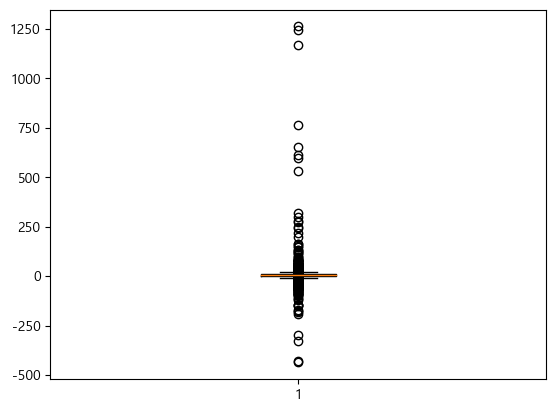

In [94]:
plt.boxplot(df["매출액순이익률"])

In [97]:
np.argmax(df["RDS"])

418

In [98]:
df.drop(index=418, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d130dc18d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d130dc2cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d130d8e610>],
 'medians': [<matplotlib.lines.Line2D at 0x1d130dc3c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d130dcc4d0>],
 'means': []}

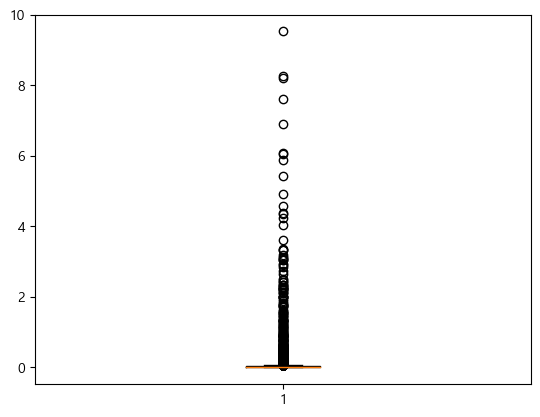

In [99]:
plt.boxplot(df["RDS"])

In [100]:
# 눈에 띄는 이상치만을 제거한 데이터프레인 저장
df.to_csv("이상치제거전.csv", encoding="UTF-8-sig")

# 이상치 제거

In [143]:
# 이상치 제거를 위한 이상치제거 전 데이터 로드
df = pd.read_csv("./이상치제거전.csv", index_col=0)


## 윈저라이징

In [102]:
from scipy.stats.mstats  import winsorize

In [144]:
# 숫자 컬럼만 있는 데이터프레임 생성 
df_수치 = df[df.select_dtypes(float).columns]
col_int = df_수치.columns
col_all = df.columns
col_obj = col_all.difference(col_int)
df_명목 = df[col_obj]

In [147]:
# 라이브러리 로드
from scipy.stats.mstats  import winsorize

# 윈저라이징을 이용해서 상위 25% 이상의 값 과 하위 25% 이하의 값을 상의 25% 값과 하위 25% 값으로 대체
df_1 = pd.DataFrame()
for i in col_int:
    a = winsorize(df_수치[i],limits=[0.05, 0.05])
    df_1[i] = a

df_수치 =df_1
df_수치

,대주주지분변화분,외국인지분분변화,자산,총자본증가율,비유동자산증가율,유동자산증가율,자기자본증가율,정상영업이익증가율,순이익증가율,총포괄이익증가율,...,유동부채비율,차입금비율,이자보상배율(이자비용),유보액대납입자본배율,투자집중도,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,WW지수,RDS
0,-25.96,3.41,9.867886e+08,0.22,-4.49,9.23,34.58,37.98,-30.29,-23.75,...,80.20,123.51,4.41,2.26,116.48,705000.0,53000.0,714.152978,-0.677243,0.069506
1,25.96,6.33,9.939507e+08,0.73,3.63,-4.14,33.31,-16.95,24.71,29.62,...,31.86,78.01,6.05,2.26,133.86,0.0,55000.0,549.453179,-0.444753,0.080072
2,0.00,6.33,1.066534e+09,7.30,6.69,8.40,22.51,-21.09,-21.19,-14.10,...,28.08,54.62,6.77,2.26,138.53,649000.0,56000.0,463.306109,-0.671716,0.078906
3,-0.14,6.33,1.088890e+09,2.10,-3.00,11.19,15.45,60.45,20.51,2.30,...,34.08,39.20,13.44,2.26,125.81,9000.0,66000.0,953.096666,-0.485689,0.068485
4,0.00,-5.93,1.178581e+09,8.24,8.56,7.73,23.26,32.02,58.67,64.83,...,32.94,22.38,36.79,2.66,113.62,0.0,70000.0,1438.838904,-0.480239,0.062517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13067,1.36,6.33,5.309435e+08,-3.13,1.75,-15.59,-10.15,0.00,0.00,-172.09,...,182.64,151.73,-0.33,2.28,58.30,232062.0,36000.0,128.995838,-0.493300,0.000000
13068,21.09,0.92,5.335714e+08,0.49,3.33,-8.24,10.07,0.00,0.00,0.00,...,175.54,151.73,1.86,2.60,51.21,233041.0,37505.0,128.995838,0.050795,0.000000
13069,9.21,-2.88,5.710601e+08,7.03,-5.03,48.81,24.61,-41.38,17.75,29.14,...,159.53,151.73,1.15,2.73,53.55,223963.0,40361.0,178.740952,-1.127735,0.000000
13070,-28.41,1.32,6.492400e+08,13.69,26.06,-13.68,7.76,-3.91,1.06,-16.61,...,140.48,142.41,1.12,3.02,59.37,196621.0,35766.0,351.474857,-0.870443,0.000000


In [ ]:
def boxplot(df,ncols,nrows): 
    plt.style.use('seaborn')
    warnings.simplefilter(action='ignore', category=FutureWarning)
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams["font.family"] = "Malgun Gothic"


    fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)

    fig.set_size_inches((20, 100))

    for col, ax in zip(df.columns, axs.T.ravel()):
        df[[col]].boxplot(ax=ax)
        
    plt.show()

df_수치 =df.select_dtypes('float')

boxplot(df_수치,5,7)


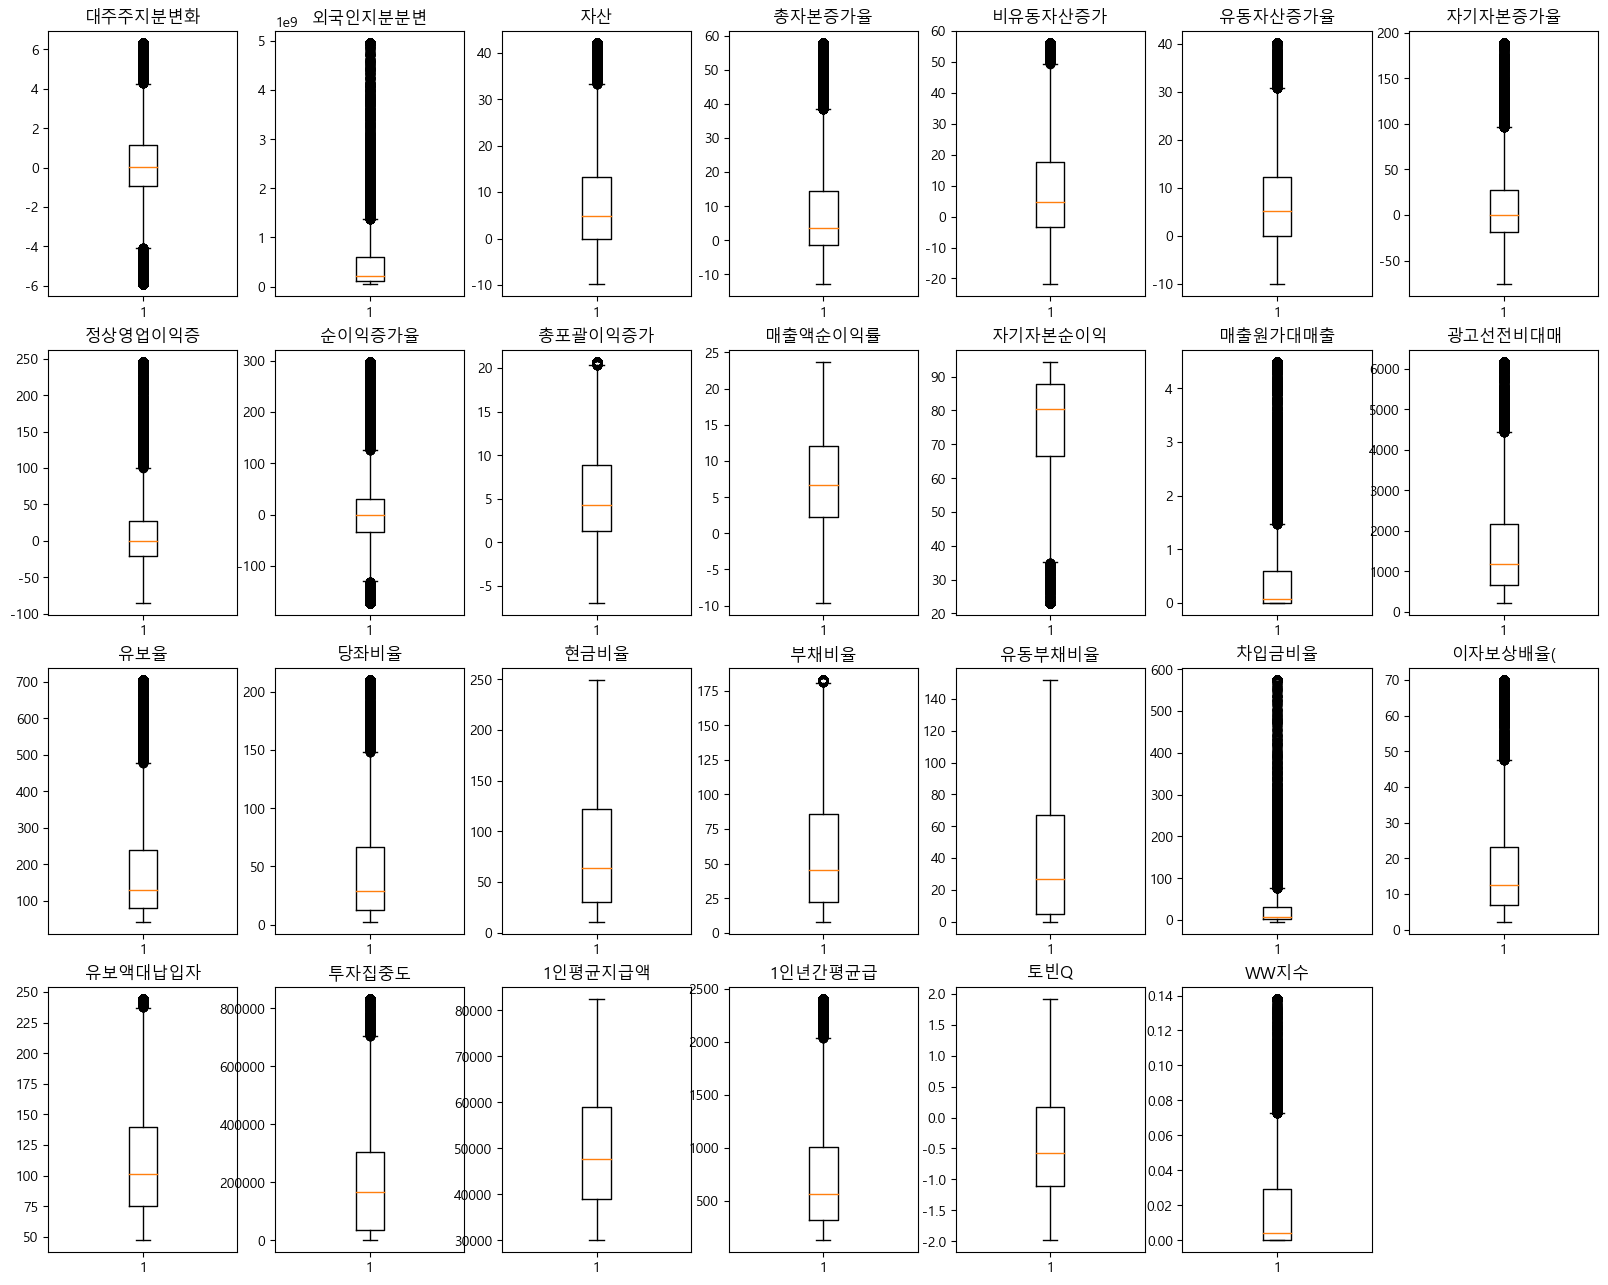

In [148]:
# 숫자현 컬럼만 있는 데이터프레임 생성 
df_수치 = df_수치[df_수치.select_dtypes(float).columns]

# 숫자형 데이터프레임 컬럼 추출
col_int=df_수치.columns

#  위저라이징을 통해 이상치를 대체한 데이터 박스플롯을 이용해 시각화

plt.figure(figsize=(20,20))

for i in range(1,28,1):
    plt.subplot(5,7,i)
    a = df_수치.iloc[:,i]
    plt.boxplot(a)
    b = col_int.str[:7][i-1]
    plt.title(b)
plt.show()
   
    

In [149]:
# 수치형 데이터와 수치형 데이터를 제외한 데이터 합병
# concat을 이용해 데이터을 단순히 합병했지만 삭제한 데이터가 없어 결측치는 없음
df_win = pd.concat([df_명목,df_수치],axis=1)

In [150]:
# 합친 데이터를 csv파일로 저장
df_win.to_csv("윈저라이징csv.csv", encoding="UTF-8-sig")

### IQR

In [151]:
# 숫자 컬럼만 있는 데이터프레임 생성 
df_수치 = df[df.select_dtypes(float).columns]
col_int = df_수치.columns
col_all = df.columns
col_obj = col_all.difference(col_int)
df_명목 = df[col_obj]

In [154]:
# iqr 함수 생성

def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx



In [155]:
# iqr 함수 사용해서 이상치 제거 
for i in col_int:
    oulier_idx = get_outlier(df=df_수치,column=i, weight=1.5)
    df_수치.drop(index= oulier_idx, axis=0,inplace=True)
    df_수치.reset_index(drop=True, inplace=True)

df_수치

C:\Users\juno\AppData\Local\Temp\ipykernel_4900\2939445277.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_수치.drop(index= oulier_idx, axis=0,inplace=True)


,대주주지분변화분,외국인지분분변화,자산,총자본증가율,비유동자산증가율,유동자산증가율,자기자본증가율,정상영업이익증가율,순이익증가율,총포괄이익증가율,...,유동부채비율,차입금비율,이자보상배율(이자비용),유보액대납입자본배율,투자집중도,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,WW지수,RDS
0,-9.82,2.23,381939281.0,5.51,-6.42,33.34,4.71,-26.52,-28.56,-49.30,...,62.39,18.64,8.48,14.20,119.34,433000.0,47000.0,412.477457,-0.339797,0.000000
1,-0.36,0.43,422833445.0,10.71,4.92,20.18,6.10,22.48,14.79,25.29,...,72.98,22.93,14.66,15.09,131.52,302000.0,47000.0,403.398355,-0.998541,0.000000
2,3.58,0.72,417865468.0,-1.17,-3.08,1.55,3.62,10.95,-1.54,-3.69,...,64.61,22.80,16.75,15.86,133.50,215000.0,48000.0,328.187829,-1.283361,0.000000
3,-0.15,1.42,93845576.0,0.71,-7.26,3.66,4.70,0.00,0.00,0.00,...,86.86,48.69,0.20,5.53,95.90,123000.0,46415.0,460.101805,-0.263883,0.000000
4,0.08,0.43,221622993.0,8.18,-1.64,16.54,5.30,-29.77,-26.98,-20.19,...,46.52,28.57,19.43,11.47,103.71,236000.0,61000.0,1116.800240,-0.361498,0.003823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,0.12,0.02,395221418.0,-10.54,-7.44,-13.30,0.85,-60.56,-52.41,-48.78,...,77.38,79.10,0.93,26.00,99.30,291000.0,47000.0,261.278392,-1.123322,0.003396
539,0.48,0.24,66713615.0,-2.02,-0.05,-2.92,6.92,-18.19,-8.13,-18.55,...,15.29,7.97,34.54,13.41,135.75,326902.0,29346.0,692.838135,-1.705969,0.000000
540,-0.74,2.82,86761068.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,18.07,22.29,12.31,16.26,125.20,420000.0,29248.0,1098.387853,-0.433517,0.003557
541,0.00,0.61,113139294.0,14.60,21.24,11.61,18.33,1.87,7.99,8.73,...,29.62,21.58,8.78,11.65,108.96,243000.0,41000.0,915.429811,0.103507,0.005766


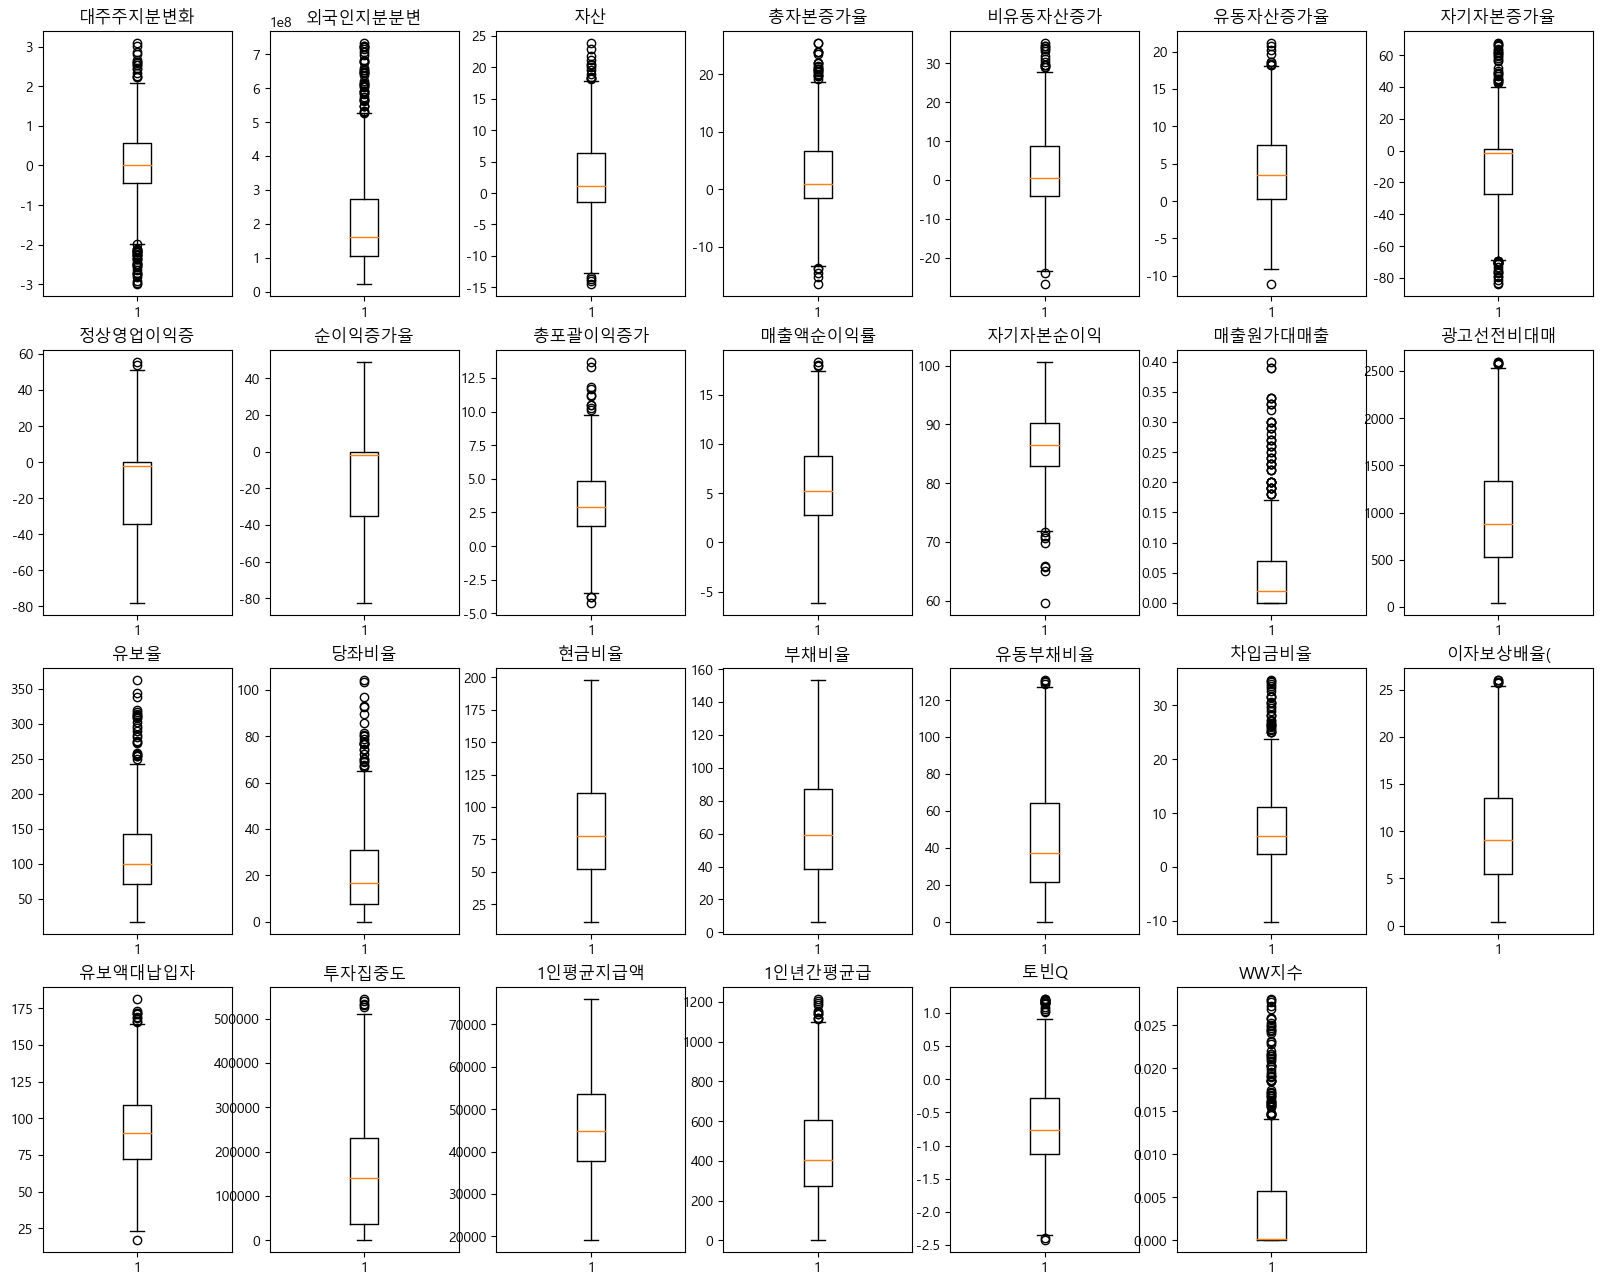

In [157]:
#  숫자현 컬럼만 있는 데이터프레임 생성 
df_수치 = df_수치[df_수치.select_dtypes(float).columns]

# 숫자형 데이터프레임 컬럼 추출
col_int=df_수치.columns

# iqr방식을 이용해서 3사분위수를 초과한 이상치화 1사분위수 미만의 이상치를 제거한 데이터를 박스플롯으로 시각화

plt.figure(figsize=(20,20))

for i in range(1,28,1):
    plt.subplot(5,7,i)
    a = df_수치.iloc[:,i]
    plt.boxplot(a)
    b = col_int.str[:7][i-1]
    plt.title(b)
plt.show()

In [158]:
# # 수치형 데이터와 수치형 데이터를 제외한 데이터 합병
df_iqr = pd.concat([df_명목,df_수치], axis=1)

In [159]:
# 단순 합병으로 인한 결측치 삭제
df_iqr.dropna(axis=0, inplace=True)

In [160]:
# iqr 이상치 제거한 데이터프레임 csv파일로 저장
df_iqr.to_csv("df_iqr.csv", encoding="UTF-8-sig")

## ESD
- 평균에서 부터 3표준편차 만큼 떨어져 있는 값(+-0.15%)을 임계값으로 보고 그 값보다 작거나 큰 값을 이상치로 분류한다 

In [161]:
# 숫자 컬럼만 있는 데이터프레임 생성 
df_수치 = df[df.select_dtypes(float).columns]
col_int = df_수치.columns
col_all = df.columns
col_obj = col_all.difference(col_int)
df_명목 = df[col_obj]

In [162]:
### ESD이상치
def EDS_outlier(df=None, col=None,weight=1.5):
    # import numpy as np
    m = np.mean(df[col])
    sd = np.std(df[col])
    sd_weight = sd*weight
    
    lowest = m -sd_weight
    highest = m + sd_weight

    outlier_idx = df[col][ (df[col] < lowest) | (df[col] > highest) ].index
    return outlier_idx

In [163]:
for i in col_int:
    oulier = EDS_outlier(df=df_수치,col= i,weight=2)
    df_수치.drop(index= oulier, axis=0, inplace=True)
    df_수치.reset_index(drop=True, inplace=True)
    

df_수치

C:\Users\juno\AppData\Local\Temp\ipykernel_4900\1286268799.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_수치.drop(index= oulier, axis=0, inplace=True)


,대주주지분변화분,외국인지분분변화,자산,총자본증가율,비유동자산증가율,유동자산증가율,자기자본증가율,정상영업이익증가율,순이익증가율,총포괄이익증가율,...,유동부채비율,차입금비율,이자보상배율(이자비용),유보액대납입자본배율,투자집중도,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,WW지수,RDS
0,0.00,8.16,1.066534e+09,7.30,6.69,8.40,22.51,-21.09,-21.19,-14.10,...,28.08,54.62,6.77,1.60,138.53,649000.0,56000.0,463.306109,-0.671716,0.078906
1,-0.14,11.29,1.088890e+09,2.10,-3.00,11.19,15.45,60.45,20.51,2.30,...,34.08,39.20,13.44,1.99,125.81,9000.0,66000.0,953.096666,-0.485689,0.068485
2,0.00,-11.99,1.178581e+09,8.24,8.56,7.73,23.26,32.02,58.67,64.83,...,32.94,22.38,36.79,2.66,113.62,0.0,70000.0,1438.838904,-0.480239,0.062517
3,2.11,3.32,8.553484e+07,-34.05,-34.35,-33.46,15.27,190.55,0.00,-98.66,...,59.90,55.71,5.62,10.48,141.36,233010.0,50868.0,689.109823,-1.991448,0.000000
4,3.58,-2.57,7.233967e+07,-8.43,-6.84,-12.41,9.84,7.05,4.71,8.01,...,12.02,8.63,29.41,13.15,125.25,267169.0,57211.0,797.136033,-1.285584,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4861,-32.18,0.06,7.470005e+07,-1.14,-0.75,-2.59,1.41,-74.35,-27.43,-19.71,...,14.32,11.67,4.66,42.28,22.15,127850.0,21884.0,321.224126,-0.398667,0.000000
4862,0.31,0.28,7.116069e+07,-4.74,-0.44,-20.97,0.75,0.00,-49.37,-43.58,...,9.05,6.18,-1.98,42.60,22.92,122736.0,22865.0,437.691659,-1.367822,0.000000
4863,-19.20,0.37,7.913716e+07,1.39,0.11,7.35,1.39,108.43,-25.71,-24.19,...,5.19,8.67,7.66,45.57,36.89,0.0,25941.0,616.903104,0.492613,0.000000
4864,-3.27,-0.94,7.991206e+07,0.98,-0.48,7.34,0.83,-22.03,-5.19,-3.91,...,12.83,8.60,5.91,45.96,34.68,140736.0,31997.0,523.827815,-0.637531,0.000000


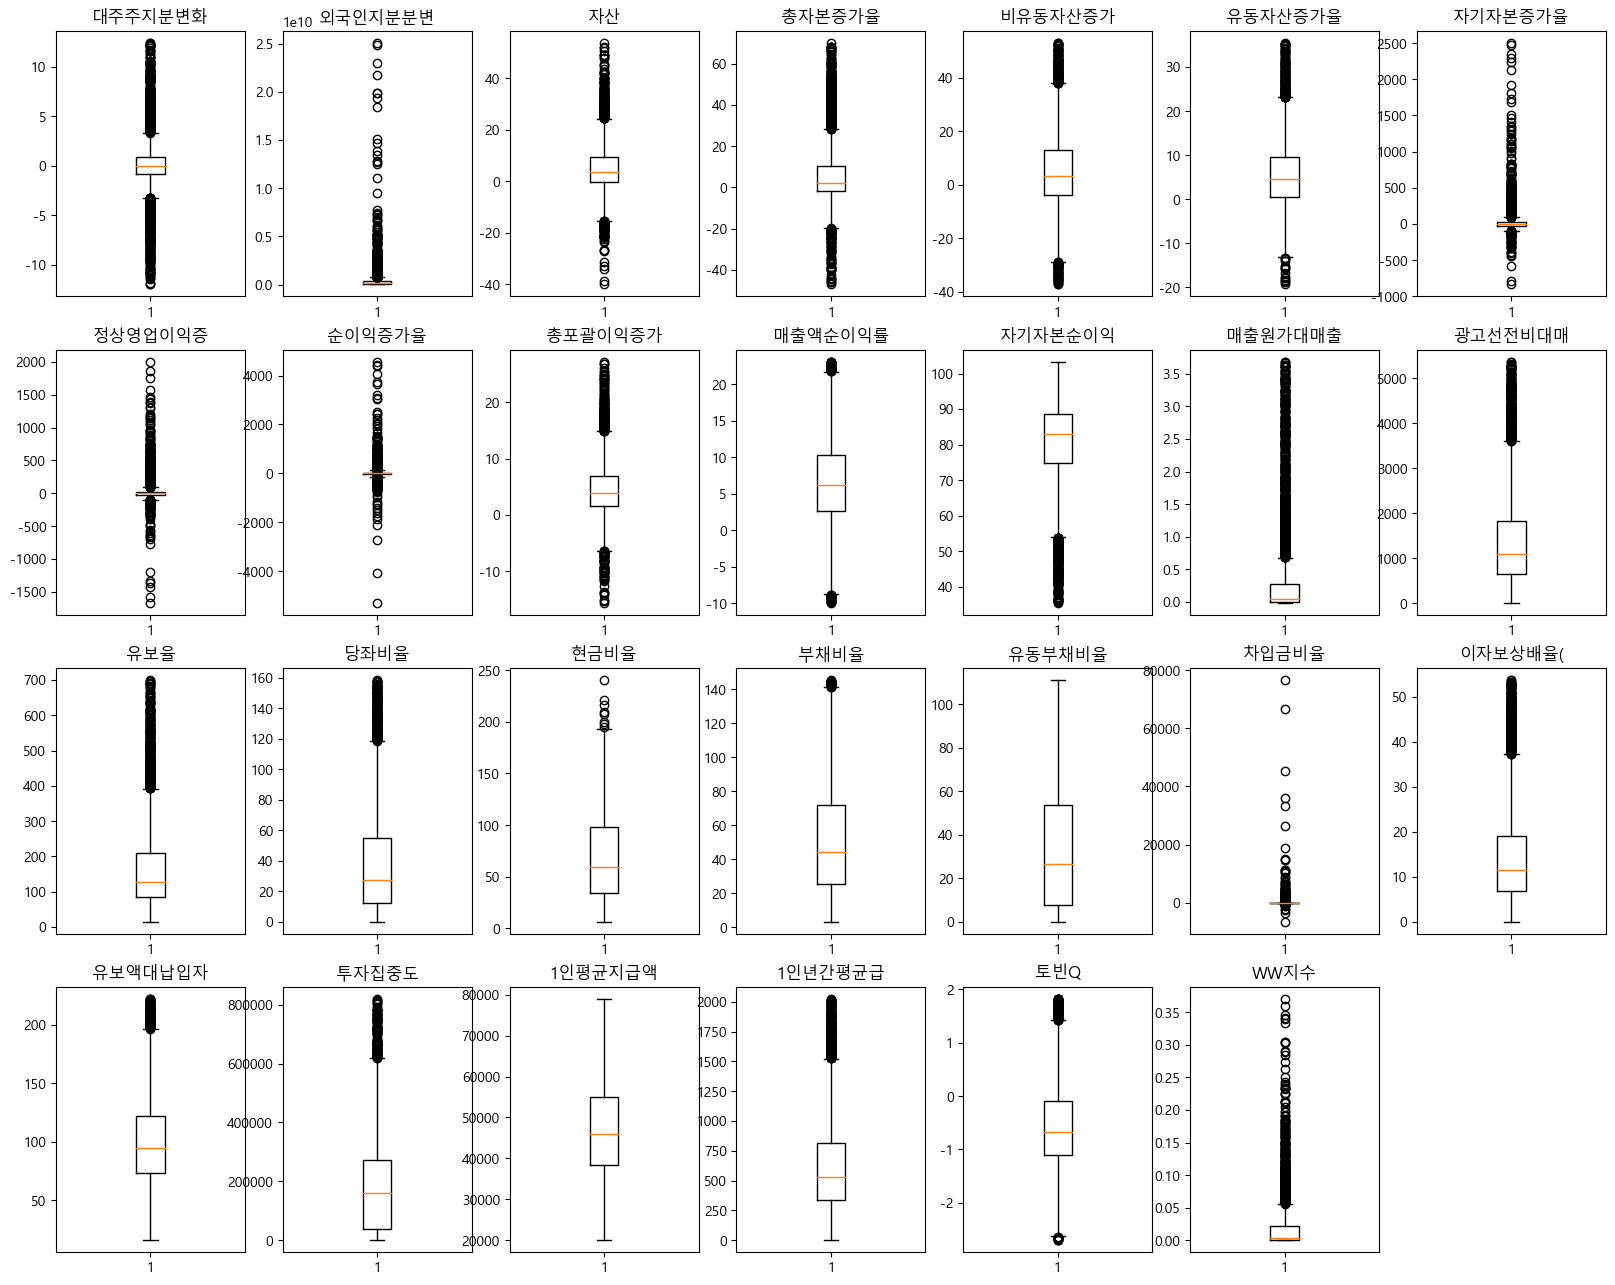

In [164]:
#  숫자현 컬럼만 있는 데이터프레임 생성 
df_수치 = df_수치[df_수치.select_dtypes(float).columns]

# 숫자형 데이터프레임 컬럼 추출
col_int=df_수치.columns

# eds방식을 이용해서 평균에서 2표준편차 이상 벗어난 이상치를 제거한 데이터를 박스플롯으로 시각화

plt.figure(figsize=(20,20))

for i in range(1,28,1):
    plt.subplot(5,7,i)
    a = df_수치.iloc[:,i]
    plt.boxplot(a)
    b = col_int.str[:7][i-1]
    plt.title(b)
plt.show()

In [165]:
# 수치형 데이터와 수치형 데이터를 제외한 데이터 합병
df_esd = pd.concat([df_명목,df_수치], axis=1)

In [166]:
# 단순 합병으로 인한 결측치 삭제
df_esd.dropna(axis=0, inplace=True)

In [167]:
# esd 이상치 제거한 데이터프레임 csv파일로 저장
df_esd.to_csv("df_esd.csv", encoding="UTF-8-sig")

## isolation forest 클러스터

In [168]:
# 숫자 컬럼만 있는 데이터프레임 생성 
df_수치 = df[df.select_dtypes(float).columns]
col_int = df_수치.columns
col_all = df.columns
col_obj = col_all.difference(col_int)
df_명목 = df[col_obj]

In [169]:
# 라이브러리 로그
from sklearn.ensemble import IsolationForest

In [170]:
clf = IsolationForest(max_samples=100, contamination = 0.1, random_state=42)
clf.fit(df_수치)

c:\Users\juno\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, max_samples=100, random_state=42)

In [173]:
# 이상치가 아닌 값 추출해서 데이터프레임 화
isol_df = df_수치[clf.predict(df_수치) != -1]

In [174]:
# 데이터 합볍
df_isol = pd.concat([df_명목, isol_df], axis=1)

In [175]:
# 데이터 단순 합병으로 인한 결측치 제거 
df_isol.dropna(axis=0,inplace=True)

In [176]:
# 데이터 csv로 저장
df_isol.to_csv("df_isol.csv", encoding= "UTF-8-sig")

## k-means clustering

In [178]:
# 숫자 컬럼만 있는 데이터프레임 생성 
df_수치 = df[df.select_dtypes(float).columns]
col_int = df_수치.columns
col_all = df.columns
col_obj = col_all.difference(col_int)
df_명목 = df[col_obj]

In [179]:
# 라이브러리 로그
from sklearn.cluster import KMeans

In [131]:
# KMeans 클러스터링을 이용해서 이상치 제거 (for문을 통해 n_clusters=13 도출)
clf = KMeans(n_clusters=2, random_state=156)
clf.fit(df_수치)
df_km = df_수치[clf.predict(df_수치)==0]

df_km

c:\Users\juno\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,대주주지분변화분,외국인지분분변화,자산,당기순이익(손실),미처분이익잉여금(결손금),총자본증가율,비유동자산증가율,유동자산증가율,자기자본증가율,매출액증가율,...,차입금비율,이자보상배율(이자비용),유보액대비율,유보액대납입자본배율,투자집중도,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,WW지수,RDS
0,25.47,0.03,1.199044e+09,-93084414.0,-544307000.0,-13.19,-14.10,-10.08,-22.60,-10.94,...,229.64,-0.75,14.50,0.81,191.23,327689.0,42000.0,263.050565,-1.307321,0.113365
1,0.00,0.80,1.157755e+09,-32121504.0,-577552000.0,-3.44,-7.69,10.52,-5.57,6.98,...,234.33,-0.31,12.85,0.67,178.58,402000.0,48000.0,244.363585,-0.309814,0.000000
2,-25.97,-0.38,1.058392e+09,-73243309.0,-72161000.0,-8.58,-1.55,-27.88,-29.61,-16.42,...,324.25,-0.16,5.91,0.28,183.05,384000.0,47000.0,231.618301,-1.370167,0.089942
3,25.93,-3.35,9.848766e+08,-58319918.0,-134158000.0,-6.95,-11.75,11.04,-41.05,14.98,...,545.50,0.67,-2.29,-0.10,153.39,873000.0,51000.0,226.258223,-0.759699,0.073573
4,0.00,6.33,9.846437e+08,127469869.0,-10928000.0,-0.02,-12.26,36.42,110.48,17.42,...,206.91,2.50,5.60,0.25,130.49,924000.0,54000.0,615.898138,-0.452127,0.074117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14421,0.65,-7.39,9.585323e+08,-16149442.0,-7193571.0,21.08,30.68,-25.08,11.22,-1.58,...,134.16,0.21,13.70,2.06,93.99,31667.0,36858.0,172.676890,-2.454427,0.000000
14422,-0.84,-0.12,8.489585e+08,-67916740.0,-55151194.0,-11.43,-14.38,13.29,-39.28,0.56,...,231.23,-0.42,6.56,0.87,82.49,30000.0,38473.0,124.971540,-0.001477,0.000000
14423,22.47,0.93,8.036985e+08,-96953501.0,-46688970.0,-5.33,-5.17,-6.33,-37.42,-9.87,...,347.18,-1.16,-1.49,-0.14,82.66,367333.0,38778.0,95.538513,-0.207171,0.000000
14424,-22.28,-4.82,4.309627e+08,-52550693.0,-52977511.0,-46.38,-51.51,-13.42,-57.73,-86.45,...,1010.48,-0.55,-5.52,-0.42,316.56,18333.0,41292.0,153.632818,-3.789462,0.000000


In [181]:
# KMeans 클러스터링을 이용해서 이상치 제거
from sklearn.metrics import silhouette_score
clf = KMeans(n_clusters=2, random_state=156)
clf.fit(df_수치)
df_km = df_수치[clf.predict(df_수치)==0]
label = clf.labels_
score_samples = silhouette_score(df_수치,label)
print('silhouette:',score_samples)

c:\Users\juno\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


silhouette: 0.9859083260577174


In [182]:
# 데이터 합병
df_km = pd.concat([df_명목,df_km], axis=1) 

In [183]:
# 데이터 합병으로 인한 결측치 제거
df_km.dropna(axis = 0, inplace = True)

In [184]:
df_km.to_csv("df_km.csv", encoding = "UTF-8-sig")